In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#data preprocessing
data=pd.read_csv('Diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df1=data[data['Outcome']==0]
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [8]:
data['Output']=data['Glucose'].apply(lambda x:'diabetic' if x>125 else ('prediabetic' if (x>=100 and x<=125) else 'normal'))
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Output
0,6,148,72,35,0,33.6,0.627,50,1,diabetic
1,1,85,66,29,0,26.6,0.351,31,0,normal
2,8,183,64,0,0,23.3,0.672,32,1,diabetic
3,1,89,66,23,94,28.1,0.167,21,0,normal
4,0,137,40,35,168,43.1,2.288,33,1,diabetic


In [9]:
data['Output']=data['Output'].replace(['normal','prediabetic','diabetic'],[0,1,2])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Output
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,2


In [10]:
data.to_csv('diabetes2.csv',index=False,header=True)

In [11]:
data=data[data['Insulin']==0]
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Output
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,2
5,5,116,74,0,0,25.6,0.201,30,0,1
7,10,115,0,0,0,35.3,0.134,29,0,1


In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Output
count,374.000000,374.000000,374.000000,374.000000,374.0,374.000000,374.000000,374.000000,374.000000,374.000000
mean,4.433155,119.409091,67.473262,11.508021,0.0,30.943316,0.415340,35.796791,0.368984,1.109626
std,3.437621,32.544233,24.522312,15.738605,0.0,8.419854,0.300547,12.729034,0.483176,0.775816
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.250000,64.000000,0.000000,0.0,26.500000,0.209000,25.000000,0.000000,0.250000
50%,4.000000,115.000000,72.000000,0.000000,0.0,31.200000,0.302500,32.000000,0.000000,1.000000
75%,7.000000,138.000000,80.000000,26.750000,0.0,35.675000,0.553250,43.000000,1.000000,2.000000
max,14.000000,199.000000,122.000000,99.000000,0.0,52.900000,1.893000,72.000000,1.000000,2.000000


In [13]:
data=data[['Glucose','Output']]
data.head()

,Glucose,Output
0,148,2
1,85,0
2,183,2
5,116,1
7,115,1


In [14]:
data=data[data['Glucose']!=0]
data.describe()

,Glucose,Output
count,370.000000,370.000000
mean,120.700000,1.121622
std,30.238604,0.771313
min,44.000000,0.000000
25%,100.250000,1.000000
50%,115.000000,1.000000
75%,138.000000,2.000000
max,199.000000,2.000000


In [15]:
data.to_csv('diabetesGlucoseNonzero.csv',index=False,header=True)

In [16]:
df=pd.read_csv('diabetes2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Output
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,2


In [17]:
df=df[['Glucose','Insulin','Output']]
df.head()

,Glucose,Insulin,Output
0,148,0,2
1,85,0,0
2,183,0,2
3,89,94,0
4,137,168,2


In [18]:
df=df[df['Glucose']!=0]
df=df[df['Insulin']!=0]
df

,Glucose,Insulin,Output
3,89,94,0
4,137,168,2
6,78,88,0
8,197,543,2
13,189,846,2
...,...,...,...
753,181,510,2
755,128,110,2
760,88,16,0
763,101,180,1


In [19]:
df.to_csv('diabetesDataNonzero.csv',index=False)

In [20]:
#Machine Learning

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=df.drop('Insulin',axis=1)
y=df['Insulin']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
reg_model=LinearRegression()

In [26]:
reg_model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred=reg_model.predict(X_test)

In [28]:
#Predict insulin values of GlucoseNonZero data where actually insulin=0
data1=pd.read_csv('diabetesGlucoseNonzero.csv')
y_pred=reg_model.predict(data1)

In [29]:
y_pred=y_pred.astype(int)
y_pred

array([223,  71, 304, 146, 144, 167, 132, 269, 202, 109, 125, 104, 334,
       153, 220, 148, 130,  87, 160, 200, 113,  83, 188, 123, 248, 297,
       218,  39, 116, 120,  44, 218,  69, 188, -23, 141, 104, 130, 130,
       172,  57,  18,  94, 183, 137, 139,  46, 111, 197, 123, 125,  60,
       190,  87, 257, 230, 167,  71,  97,  50, 218, 164,  55,  99, 134,
       186, 139, 120, 160,  69, 179, 177, 123, 127, 113,   7, 220,  83,
       141, 315, 232, 230, 109, 183, 223, 155, 132, 113,  76,  71, 211,
       181,  76,  44, 207, 329, 134, 248, 193,  71, 120, 139, 200, 127,
       134, 255, 306,  62, 220, 294,  71, 137, 246, 153, 111, 255, 209,
       160, 276, 294, 260, 118,  85, 202, 306, 160, 134, 123, 179,  74,
       139, 134, 141, 207,  94, 209, 162, 200, 177, 113, 218, 111, 160,
       123, 123, 141, 218, 253, 127, 253, 137, 267, 144, 227,  60, 130,
       301, 329, 137, 164, 137, 294, 150, 297, 123, 148, 144, 292, 160,
        94, 146,  87, 197,  16,  83, 262, 179, 246, 116, 218, 16

In [30]:
predicted=pd.DataFrame(y_pred,columns=['Insulin'])
predicted.to_csv('diabetesInsulinPred.csv',index=False,header=True)

In [31]:
df1=pd.read_csv('diabetesGlucoseNonzero.csv')
df2=pd.read_csv('diabetesInsulinPred.csv')
df3=pd.concat([df1,df2],axis=1)
df3=df3[['Glucose','Insulin','Output']]
df3

,Glucose,Insulin,Output
0,148,223,2
1,85,71,0
2,183,304,2
3,116,146,1
4,115,144,1
...,...,...,...
365,170,274,2
366,89,81,0
367,122,160,1
368,126,172,2


In [32]:
df4=pd.read_csv('diabetesDataNonzero.csv')
df4

,Glucose,Insulin,Output
0,89,94,0
1,137,168,2
2,78,88,0
3,197,543,2
4,189,846,2
...,...,...,...
388,181,510,2
389,128,110,2
390,88,16,0
391,101,180,1


In [33]:
data=pd.concat([df3,df4])
data.to_csv('diabetesMerge.csv',index=False)
data.head()

,Glucose,Insulin,Output
0,148,223,2
1,85,71,0
2,183,304,2
3,116,146,1
4,115,144,1


In [34]:
#K-Neighbors classification

In [35]:
X=data.drop('Output',axis=1)
y=data['Output']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
pred=knn.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[51  5  0]
 [ 6 77  3]
 [ 0  7 80]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        56
           1       0.87      0.90      0.88        86
           2       0.96      0.92      0.94        87

    accuracy                           0.91       229
   macro avg       0.91      0.91      0.91       229
weighted avg       0.91      0.91      0.91       229



In [39]:
#Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [41]:
pred1=logmodel.predict(X_test)

In [42]:
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

[[56  0  0]
 [ 0 86  0]
 [ 0  0 87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        87

    accuracy                           1.00       229
   macro avg       1.00      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229



In [43]:
#Naive Bayes Classification

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
model=GaussianNB()
model.fit(X_train,y_train)
pred2=model.predict(X_test)

In [46]:
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

[[52  3  1]
 [ 5 78  3]
 [ 0  6 81]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        56
           1       0.90      0.91      0.90        86
           2       0.95      0.93      0.94        87

    accuracy                           0.92       229
   macro avg       0.92      0.92      0.92       229
weighted avg       0.92      0.92      0.92       229



In [47]:
from sklearn.metrics import accuracy_score

In [48]:
v1=knn.score(X_train, y_train)
v2=knn.score(X_test, y_test)
v3=logmodel.score(X_train, y_train)
v4=logmodel.score(X_test, y_test)
v5=model.score(X_train, y_train)
v6=model.score(X_test, y_test)

In [49]:
#Input window

In [50]:
from tkinter import *

In [51]:
def processing():
    val=int(e1.get())
    val2=int(e2.get())
    list=[[val,val2]]
    df=pd.DataFrame(list)
    df.to_csv("processdata.csv")
    top.destroy()

top=Tk()
top.geometry('400x400')
top.title("Input the Glucose and Insulin Data")
L1=Label(top,text="Enter Glucose value").grid(row=0)
e1=Entry(top,bd=5)
e1.grid(row=0,column=2)
L2=Label(top,text="Enter Insulin value").grid(row=1)
e2=Entry(top,bd=5)
e2.grid(row=1,column=2)
b=Button(top,text='Submit',command=processing)
b.grid(row=2,column=1)
top.mainloop()

In [52]:
process_data=pd.read_csv('processdata.csv',names=['Glucose','Insulin'])

In [53]:
d=process_data[process_data['Glucose']!=0]
prediction=knn.predict(d)

In [54]:
probability = knn.predict_proba(d)
diab_probability = probability[0][2] * 100

In [55]:
if prediction==0:
    prediction='Normal'
elif prediction==1:
    prediction='Pre-Diabetic'
elif prediction==2:
    prediction='Diabetic'
else:
    prediction='None'

In [56]:
t=Tk()
t.title("Output")
var1=StringVar()
var2=StringVar()
var3=StringVar()
var4=StringVar()
var5=StringVar()
var6=StringVar()
l1=Label(t,text="K-Neighbors Train Accuracy : "+str(v1),font=("Courier New",14)).grid(row=0,pady=(10, 0))
l2=Label(t,text="K-Neighbors Test Accuracy : "+str(v2),font=("Courier New",14)).grid(row=1,pady=(30, 0))
l3=Label(t,text="Logistic Regression Train Accuracy : "+str(v3),font=("Courier New",14)).grid(row=2,pady=(30, 0))
l4=Label(t,text="Logistic Regression Test Accuracy : "+str(v4),font=("Courier New",14)).grid(row=3,pady=(30, 0))
l5=Label(t,text="Gaussian NB Train Accuracy : "+str(v5),font=("Courier New",14)).grid(row=4,pady=(30, 0))
l6=Label(t,text="Gaussian NB Test Accuracy : "+str(v6),font=("Courier New",14)).grid(row=5,pady=(30, 0))
    
if prediction=='Normal':
    l7=Label(t,text="Your Diabetes Status is "+prediction+". It's Nice and Continue in Same Way.",font=("Brush Script MT", 16, "bold")).grid(row=6,pady=(30,0))
if prediction=='Pre-Diabetic':
    l7=Label(t,text="Your Diabetes Status is "+prediction+". You are having "+str(diab_probability)+" % chances of being diabetic.Becareful n Take Proper Measures.",font=("Brush Script MT", 16, "bold")).grid(row=6,pady=(30,0))
if prediction=='Diabetic':
    l7=Label(t,text="Your are already having Diabetes.Consult Doctor Immediately n Take proper medication time-to-time.",font=("Brush Script MT", 16, "bold")).grid(row=6,pady=(30,0))

var1.set(v1)
var2.set(v2)
var3.set(v3)
var4.set(v4)
var5.set(v5)
var6.set(v6)
t.geometry('1000x500')
t.mainloop()

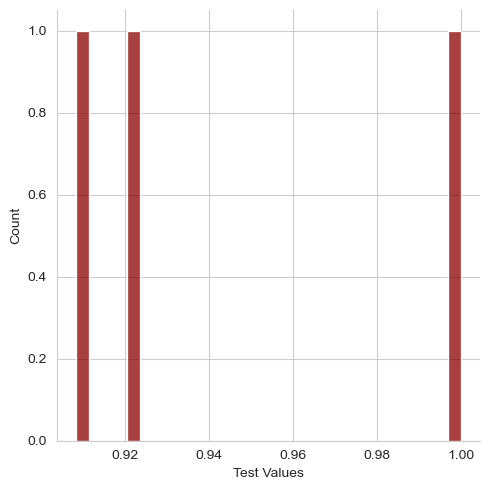

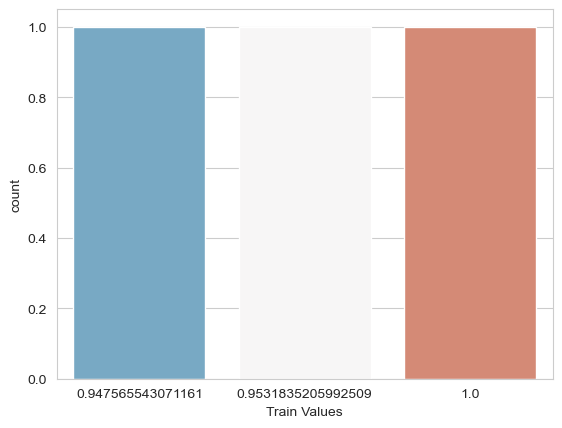

In [57]:
plot=pd.DataFrame([v2,v4,v6],columns=["Test Values"])
plot1=pd.DataFrame([v1,v3,v5],columns=["Train Values"])
sns.set_style('whitegrid')
sns.displot(plot['Test Values'],kde=False,color='darkred',bins=30)
plt.show()
sns.set_style('whitegrid')
sns.countplot(x='Train Values',data=plot1,palette='RdBu_r')
plt.show()

In [59]:
# data=pd.read_csv('diabetesMerge.csv')
# data.head()

,Glucose,Insulin,Output
0,148,223,2
1,85,71,0
2,183,304,2
3,116,146,1
4,115,144,1


In [60]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# sc.fit(data.drop('Output',axis=1))

StandardScaler()

In [62]:
# scaled_feat=sc.transform(data.drop('Output',axis=1))
# df_feat=pd.DataFrame(scaled_feat,columns=data.columns[:-1])
# df_feat.head()

,Glucose,Insulin
0,0.862287,0.674077
1,-1.202229,-0.865867
2,2.009241,1.494706
3,-0.186356,-0.106026
4,-0.219126,-0.126288


In [63]:
# X_train,X_test,y_train,y_test=train_test_split(scaled_feat,data['Output'],test_size=0.30,random_state=0)
# knn=KNeighborsClassifier()
# knn.fit(X_train,y_train)
# pred1=logmodel.predict(X_test)
# v1=knn.score(X_train, y_train)
# v2=knn.score(X_test, y_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [66]:
# print(v2)

0.9519650655021834
